In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/car_prices.csv")

trim- additional designation for the vehicle model.
vin- Vehicle Identification Number, a unique code for each vehicle.
condition- Condition of the vehicle, possibly rated on a scale.
odometer- The mileage or distance traveled by the vehicle.
seller- The entity selling the vehicle.
mmr- Manheim Market Report, possibly indicating the estimated market value of the vehicle.

In [ ]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
df.isnull().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,4
state,0
condition,11820
odometer,94


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
year,0
make,0
model,0
trim,0
body,0
transmission,0
vin,0
state,0
condition,0
odometer,0


In [ ]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [ ]:
df.shape

(472325, 16)

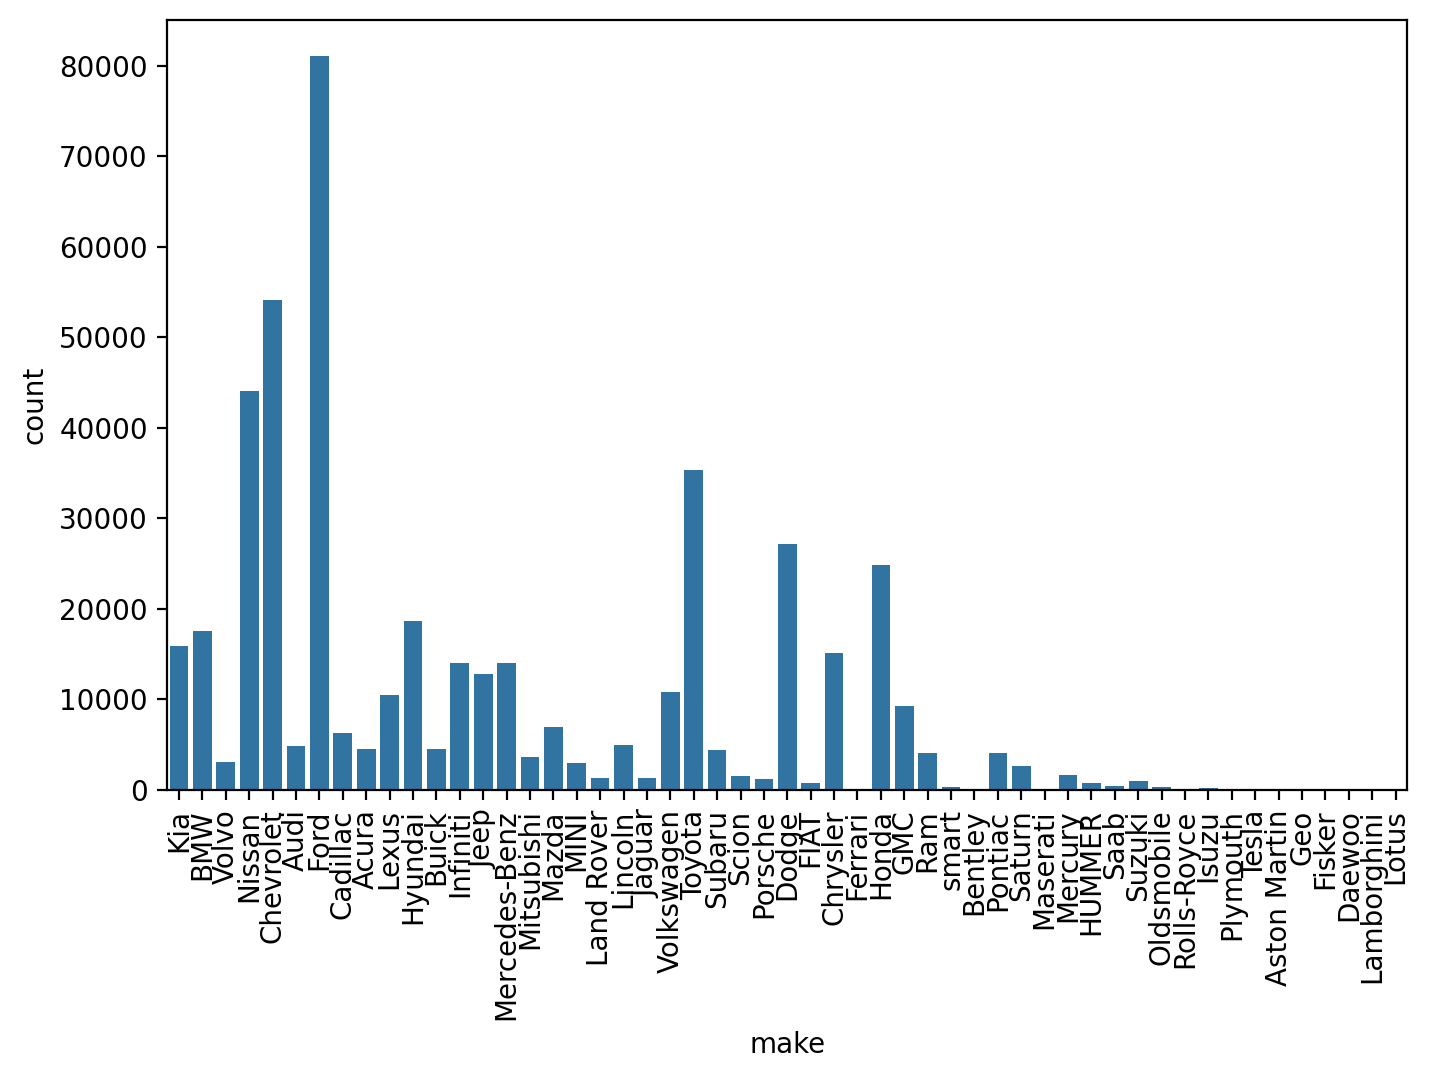

In [ ]:
plt.figure(figsize=(8,5),dpi=200)
sns.countplot(data=df,x='make')
plt.xticks(rotation=90);

<Axes: xlabel='transmission', ylabel='count'>

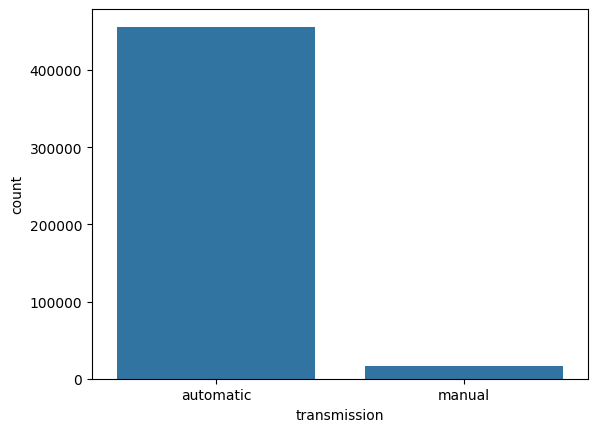

In [ ]:
sns.countplot(data=df,x='transmission')

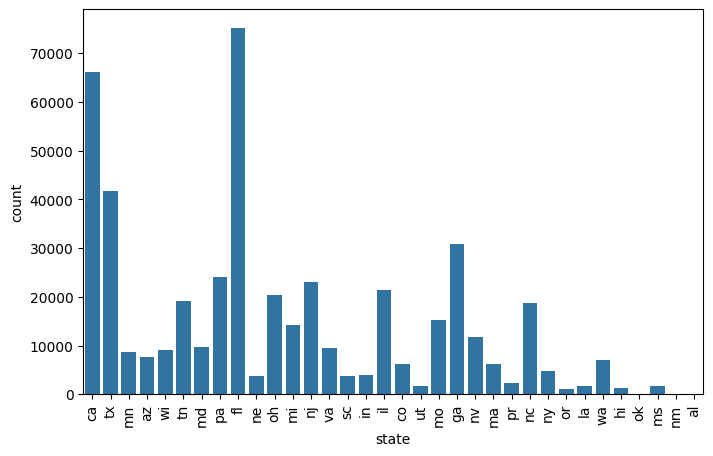

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='state')
plt.xticks(rotation=90);

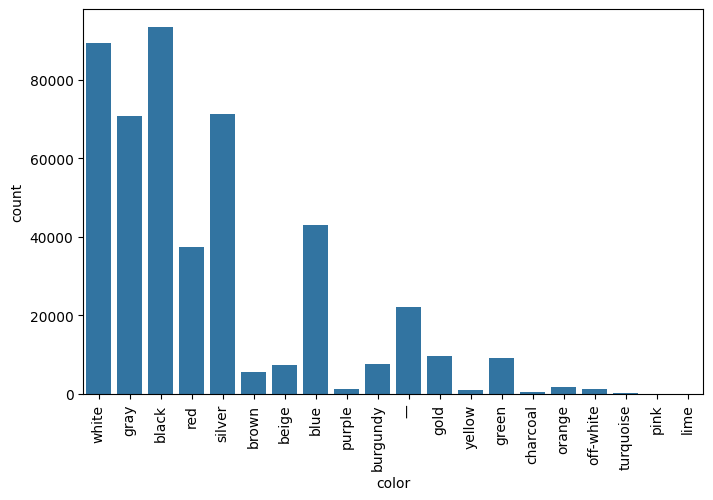

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='color')
plt.xticks(rotation=90);

<Axes: xlabel='sellingprice', ylabel='Count'>

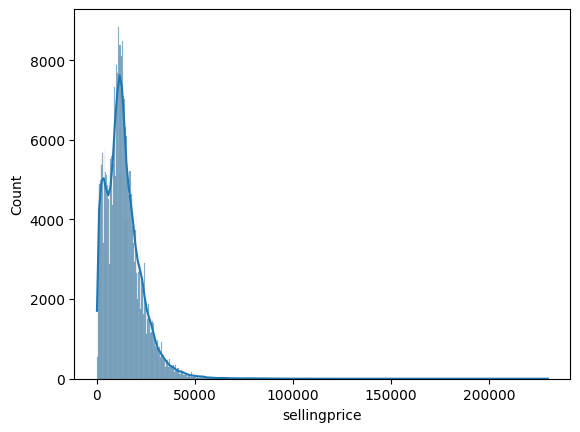

In [ ]:
sns.histplot(data=df, x='sellingprice',kde=True)

<Axes: xlabel='odometer', ylabel='sellingprice'>

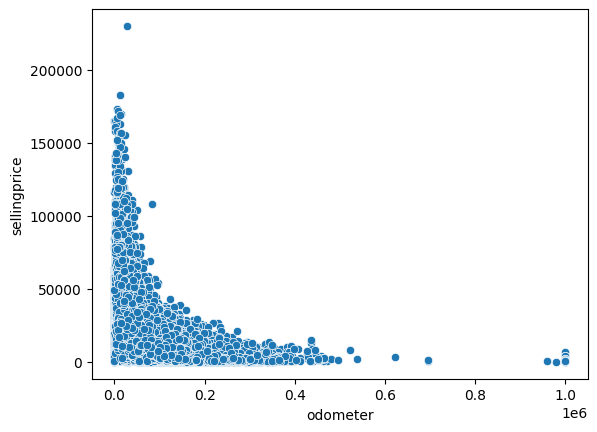

In [ ]:
sns.scatterplot(data=df,y='sellingprice',x='odometer')

In [ ]:
df = df[df['odometer']<500000]

In [ ]:
df = df[df['sellingprice']<170000]

<Axes: xlabel='odometer', ylabel='sellingprice'>

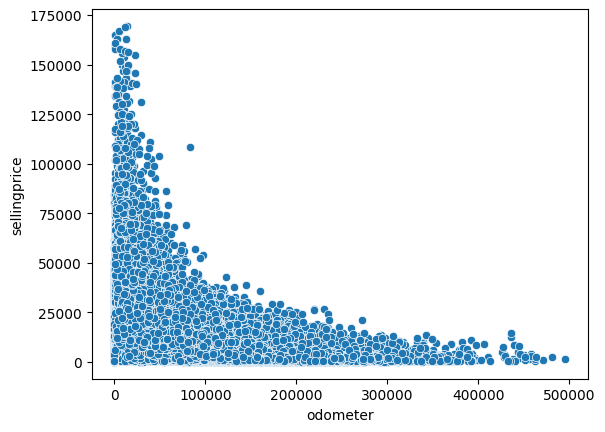

In [ ]:
sns.scatterplot(data=df,y='sellingprice',x='odometer')

<Axes: xlabel='sellingprice', ylabel='mmr'>

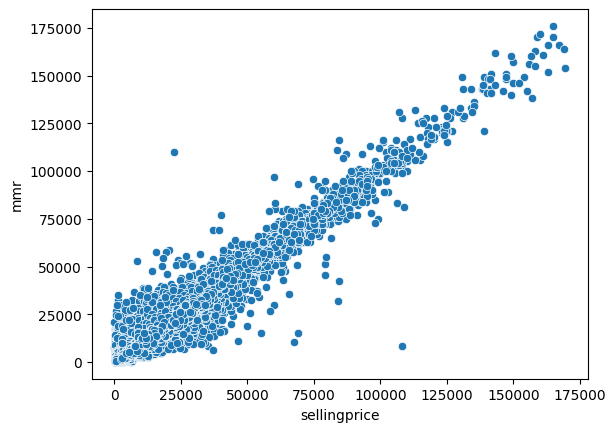

In [ ]:
sns.scatterplot(data=df,x='sellingprice',y='mmr')

In [ ]:
df.to_csv('Sales Performance Dashboard.csv',index=False)

In [ ]:
df = df.drop(['saledate','vin','trim','body','interior','seller','state'],axis=1)

In [ ]:
df = pd.get_dummies(data=df,drop_first=True)

In [ ]:
df.head()

,year,condition,odometer,mmr,sellingprice,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,...,color_off-white,color_orange,color_pink,color_purple,color_red,color_silver,color_turquoise,color_white,color_yellow,color_—
0,2015,5.0,16639.0,20500.0,21500.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2015,5.0,9393.0,20800.0,21500.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2014,45.0,1331.0,31900.0,30000.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2015,41.0,14282.0,27500.0,27750.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2014,43.0,2641.0,66000.0,67000.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = df.drop('sellingprice',axis=1)
y = df['sellingprice']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

In [ ]:
MAE

1040.9820063841464

In [ ]:
MSE

2647784.7989169545

In [ ]:
RMSE

1627.2015237569544

In [ ]:
r2

0.9711695754136507

In [ ]:
reg.coef_

array([-3.82563311e+01,  3.88501870e+01, -2.04756879e-03,  9.72529622e-01,
        3.50584651e+03,  1.24434939e+02, -1.07709040e+02,  1.10419755e+00,
       -6.00267622e+01, -1.49429936e+02,  3.89521141e+01,  4.12044448e+03,
       -1.07074009e+02, -1.84983861e+03,  2.68923616e+01, -7.28731777e+02,
       -9.51504873e+02, -1.89416501e+02, -2.07053493e+02,  2.94850445e+02,
        8.09195054e+02, -1.80880282e+01, -1.70277588e+02, -4.79100480e+02,
        1.00753815e+02, -2.98482054e+01,  2.16620904e+02, -1.96445937e+02,
       -1.62113851e+02,  4.77355899e+01, -5.90630581e+00,  8.27335112e+01,
        7.19086280e+02, -1.29945269e+02,  6.27362262e+01, -1.23241663e+02,
       -7.82425432e+02,  1.39674763e+02, -8.74277666e+01, -5.54211795e+01,
       -5.20634527e+01, -2.06132588e+03, -6.50566397e+01, -3.17748714e+01,
       -1.37622932e+03,  1.26863680e+03, -2.72784815e+01, -1.50869309e+02,
       -1.31499106e+02, -2.22578749e+01,  1.78485748e+02, -2.22631408e+01,
       -5.24936480e+01, -

In [ ]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(eps=0.0001, n_alphas=1000,cv=10,max_iter=100000)
lasso.fit(X_train,y_train)

LassoCV(cv=10, eps=0.0001, max_iter=100000, n_alphas=1000)

In [ ]:
y_pred1 = lasso.predict(X_test)

In [ ]:
MAE1 = mean_absolute_error(y_test,y_pred1)
MSE1 = mean_squared_error(y_test,y_pred1)
RMSE1 = np.sqrt(mean_squared_error(y_test,y_pred1))
r2_1 = r2_score(y_test,y_pred1)

In [ ]:
MAE1

1078.5729590606393

In [ ]:
MSE1

2874151.687506744

In [ ]:
RMSE1

1695.3323236188073

In [ ]:
r2

0.9711695754136507

In [ ]:
lasso.coef_

array([-0.        ,  0.        , -0.00124244,  0.98696227,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.  

In [ ]:
results = pd.DataFrame(
    {
    'MAE' : [MAE,MAE1],
    'MSE' : [MSE,MSE1],
    'RMSE' : [RMSE,RMSE1],
    'R2 Score' : [r2,r2_1]
})
results.index = ['Linear Regressio','LassoCV']
results.columns = ['MAE','MSE','RMSE','R2 Score']
results

,MAE,MSE,RMSE,R2 Score
Linear Regressio,1040.982006,2.647785e+06,1627.201524,0.971170
LassoCV,1078.572959,2.874152e+06,1695.332324,0.968705
